# Feature Engineering : Machine Learning

**1. Missing Value Handling:**
 *   Define a threshold for missing values (e.g., lower = 40%, upper = 60%)
 *   Drop columns where missing values exceed the threshold.



**2. Correlated Feature Removal:**
*   Define a correlation threshold (e.g., 95%)
Use pairplot, crosstab, or a correlation matrix to visualize correlations.
*   Drop features that are highly correlated (above the threshold).


In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features
df.drop(to_drop, axis=1, inplace=True)


**3. Feature Importance:**

  *   Calculate feature importance using models like Random Forest.
  *   Select top features based on importance scores.


**4. Variance Thresholding:**

  *   Use for unsupervised learning.
  *   Remove features with low variance, which indicates they provide little information.


  * **High variance feature** : more useful info for unsupervised learning
  * **Low variance feature** : similar value across samples



In [ ]:
from sklearn.feature_selection import VarianceThreshold
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
threshold = 1
selector = VarianceThreshold(threshold)
selector.fit(df)
df.columns[selector.get_support()]


**5. Univariate Feature Selection:**

  * Use statistical tests (e.g., chi2, Pearson-correlation) to select features.
  *  Select top features based on the test scores.

  * **Regression**: r_regression, f_regression, mutual_info_regression
  * **Classification**: chi2, f_classif, mutual_info_classif



In [ ]:
#Select top 2 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =2)
selector.fit(X, y)
X.columns[selector.get_support()]

**6. SelectFromModel:**
Select features based on importance attributes from a model (e.g., coefficients from Logistic Regression).

In [ ]:
from sklearn.feature_selection import SelectFromModel
sfm_selector = SelectFromModel(estimator=LogisticRegression())
sfm_selector.fit(X, y)
X.columns[sfm_selector.get_support()]


**7. Sequential Feature Selection:**
Use greedy search based on cross-validation scores to select features.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs_selector = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select=3, cv=10, direction='backward')
sfs_selector.fit(X, y)
X.columns[sfs_selector.get_support()]


# Multivariate Feature Selection

**Feature Combination:**
Create new features by combining existing ones using feature transformation.

**Use ElasticNet:**
Use PolynomialFeatures or SplineTransformer to create new features.



In [ ]:
poly = PolynomialFeatures(2) # f(x1,x2) -> R(1,x1,x2,x1*x1,x1*x2,x2*x2)
poly = PolynomialFeatures(degree=3, interaction_only=True)
#f(x1,x2,x3) -> R(1,x1,x2,x3,x1*x2,x1*x3,x2*x3,x1*x2*x3)

poly.fit_transform(X)
spline = SplineTransformer(degree=2, n_knots=3)

**Using SelectFromModel:**
Select features based on the importance attribute of a model (similar to RFE but not the same).

**As a part of Pipeline:**
Include feature selection as a step in your machine learning pipeline.

In [ ]:
transformer = FunctionTransformer(np.log1p, validate=True)
transformer.transform(X)


clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)



#When to Do Feature Scaling?


**Tree-Based Algorithms:**
   1. Tree-based algorithms like decision trees, random forests, and gradient boosting are not affected by monotonic transformations of features

   2. Techniques like mean centering or scaling do not impact their performance


**Gradient Descent-Based Algorithms:**

  1. Having features on a similar scale helps gradient descent converge faster to the minima.

  2.For neural networks, scaling features leads to faster training, avoids getting stuck in local optima, gives better error surfaces, and enables easier regularization

**Distance-Based Algorithms:**

  1. Algorithms like k-nearest neighbors, k-means clustering, and support vector machines rely on distance calculations between data points

  2.Feature scaling ensures all features contribute equally to the distance calculations

**Principal Component Analysis (PCA):**

  1. PCA aims to find components that maximize variance

  2.If features are on different scales, PCA may overemphasize the high-variance features

**Regression:**

1. For regression tasks, very large scales of features can lead to small coefficient values

2. Centering is recommended to avoid collinearity when creating polynomial or interaction terms


#Types of Feature Scaling (from sklearn.preprocessing):

### Data leakage : fit() + transform() on X_train  & only transform() on X_test data

**MinMaxScaler:** Scales features to a given range, often [0, 1].

    x_new = x - min(x)/max(x)-min(x)
    x_new = x - min(x)*(b-a)/max(x)-min(x) # output range in [a,b]

**StandardScaler:** Scales features to have a mean of 0 and variance of 1.

    x_new = x - mean(x)/std(x)

**MaxAbsScaler:** Scales features to [-1, 1] by dividing by the maximum absolute value.

**RobustScaler:** Scales features using the median and the interquartile range, making it robust to outliers.

**Quantile Transformer Scaler / Rank Scaler:**Transforms features to follow a uniform or normal distribution.

**Power Transformer Scaler:** Makes data more Gaussian-like using a family of parametric, monotonic transformations. It uses Box-Cox requires input data to be strictly positive,while Yeo-Johnson supports both positive or negative data.

**Unit Vector Scaler:** Scales features to have unit length, useful for features with hard boundaries.

    x_new = x/norm(x)


# Feature Selection for Models with Low and High Number of Samples:

**Low Number of Samples:** Avoid data-driven optimization; rely on domain knowledge and simple models.

**High Number of Features:** Use statistical tests, recursive feature elimination, L1 regularization, or dimensionality reduction techniques.

#Encoding : Machine Learning


Encoding is the process of converting categorical data into a numerical format that can be understood by machine learning models. There are different encoding techniques based on the type of categorical variable - nominal or ordinal.

### 1. Nominal Categorical Variables
Nominal variables have categories without any inherent order or ranking. Common encoding techniques for nominal variables are:

#### 1.1 One-Hot Encoding
One-hot encoding creates new binary columns for each unique category value. It avoids multi-collinearity by dropping one of the columns (dummy variable trap).

In [ ]:
# One-Hot Encoding
df2 = pd.get_dummies(features['Method'])

# Avoiding Dummy Variable Trap
dum = pd.get_dummies(data=df_cat, drop_first=True)

#### 1.2 Binary Encoding
Binary encoding converts each category into its binary representation, reducing dimensionality compared to one-hot encoding.

In [ ]:
encoder = ce.BinaryEncoder(cols=['Month'], return_df=True)
data = encoder.fit_transform(data)

#### 1.3 Target Encoding
Target encoding replaces categories with the mean of the target variable for that category. It helps capture the relationship between categories and the target.

In [ ]:
tenc = ce.TargetEncoder(smoothing=1)
df_city = tenc.fit_transform(df['City'], df['Yearly Salary in Thousands'])



#### 1.4 Other Techniques
- Hash Encoding: Hashes category values to reduce dimensionality but can lead to information loss.
- Base-N Encoding: Encodes categories as base-N digits, reducing dimensionality compared to one-hot encoding.
- Sum/Deviation Encoding: Encodes categories as -1, 0, 1, capturing the difference from the mean.

### 2. Ordinal Categorical Variables
Ordinal variables have categories with an inherent order or ranking.

#### 2.1 Label Encoding
Label encoding assigns a unique integer to each category based on the order.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Region'] = le.fit_transform(features['Regionname'])


#### 2.2 Ordinal Encoder
The OrdinalEncoder from scikit-learn encodes ordinal categories as integers while preserving the order.



In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit_transform(X)



### Best Practices
- For nominal variables, one-hot encoding is most commonly used. Binary encoding can be an alternative to avoid the curse of dimensionality.
- For ordinal variables, use ordinal encoding techniques like LabelEncoder or OrdinalEncoder.
- Target encoding can capture relationships between independent and dependent features but be careful of overfitting and target leakage.
- Frequency and count encoders can be used when the count refers to the target variable.
- Avoid introducing multi-collinearity by dropping one column in one-hot encoding.

The choice of encoding technique depends on the variable type, the machine learning algorithm used, and the trade-off between preserving information and reducing dimensionality.

#Multicollinearity - IVF & RFE

In [ ]:
import numpy as np
import pandas as pd

missing_percentages = {'Credit_History': 8.143322, 'Self_Employed': 5.211726, 'LoanAmount': 3.583062, 'Dependents': 2.442997, 'Loan_Amount_Term': 2.280130, 'Gender': 2.117264, 'Married': 0.488599}

num_entries = 1000

data = {'Gender': np.random.choice(['Male', 'Female'], num_entries, p=[0.5, 0.5]),
        'Married': np.random.choice(['No', 'Yes'], num_entries, p=[0.6, 0.4]),
        'Dependents': np.random.choice(['0', '1', '2', '3+'], num_entries, p=[0.3, 0.3, 0.2, 0.2]),
        'Education': np.random.choice(['Graduate', 'Not Graduate'], num_entries),
        'Self_Employed': np.random.choice(['No', 'Yes'], num_entries, p=[0.8, 0.2]),
        'ApplicantIncome': np.random.randint(1000, 5000, num_entries),
        'CoapplicantIncome': np.random.uniform(0, 2000, num_entries),
        'LoanAmount': np.random.uniform(50, 300, num_entries),
        'Loan_Amount_Term': np.random.choice([360, 180, 120], num_entries, p=[0.7, 0.1, 0.2]),
        'Credit_History': np.random.choice([1.0, 0.0], num_entries, p=[0.6, 0.4]),
        'Property_Area': np.random.choice(['Urban', 'Rural', 'Semiurban'], num_entries),
        'Loan_Status': np.random.choice(['Y','N'], num_entries)}

df = pd.DataFrame(data)

# Inject missing values based on the specified percentages
for col, missing_pct in missing_percentages.items():
    mask = np.random.choice([True, False], size=df.shape[0], p=[missing_pct / 100, 1 - missing_pct / 100])
    df.loc[mask, col] = np.nan

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,3305,1125.666218,187.268322,120.0,NaN,Rural,Y
1,Male,No,3+,Graduate,Yes,2345,0.157508,259.419897,180.0,1.0,Rural,Y
2,Male,No,1,Not Graduate,No,3003,295.064294,55.685751,360.0,1.0,Rural,Y
3,Female,No,1,Graduate,No,2158,1760.875499,194.649448,120.0,1.0,Rural,Y
4,Female,No,0,Graduate,No,4056,124.433440,253.669262,360.0,1.0,Rural,Y


In [ ]:
df_num = df.select_dtypes(include=np.number).columns
df_cat = df.select_dtypes(exclude=np.number).columns
df_missing = df.isnull().sum().sort_values(ascending=False)*100/(len(df))
print("Numerical Columns : ",df_num)
print("="*300)
print("Categorial Columns : ",df_cat)
print("="*300)
print("Missing Values :\n",df_missing)

Numerical Columns :  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Categorial Columns :  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')
Missing Values :
 Credit_History       8.0
Self_Employed        4.5
LoanAmount           4.5
Dependents           2.7
Loan_Amount_Term     2.0
Gender               1.8
Married              0.4
Education            0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64


###Remove Multi-collinearity - Variance Inflation Factor

    VIF below 5: no multicollinearity.
    VIF between 5 and 10: possible multicollinearity, further investigation may be needed.
    VIF above 10: strong multicollinearity, which can affect the reliability of your results.

Due to the inflated standard errors the coefficient appear less significant even if it truly has an effect.

Imagine the true effect of a variable is strong, but because other variables are picking up some of its explanatory power, the coefficient seems weaker than it actually is.

In [ ]:
df= df.replace({'Gender':{'Male':0,'Female':1},
                'Married':{'No':0,'Yes':1},
                'Dependents':{'0':0,'1':1,'2':2,'3+':3},
                'Education':{'Graduate':1,'Not Graduate':0},
                'Self_Employed':{'No':0,'Yes':1},
                'Property_Area':{'Urban':2,'Rural':0,'Semiurban':1},
                'Loan_Status' : {'Y':1,'N':0}
                })

Numerical Columns  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Removing columns with high VIF: ApplicantIncome, LoanAmount, Loan_Amount_Term
VIF after removing high VIF columns:
            Features   VIF
0             Gender  1.85
1            Married  1.54
2         Dependents  2.15
3          Education  1.72
4      Self_Employed  1.23
5  CoapplicantIncome  2.91
6     Credit_History  2.28
7      Property_Area  2.22
8        Loan_Status  1.88


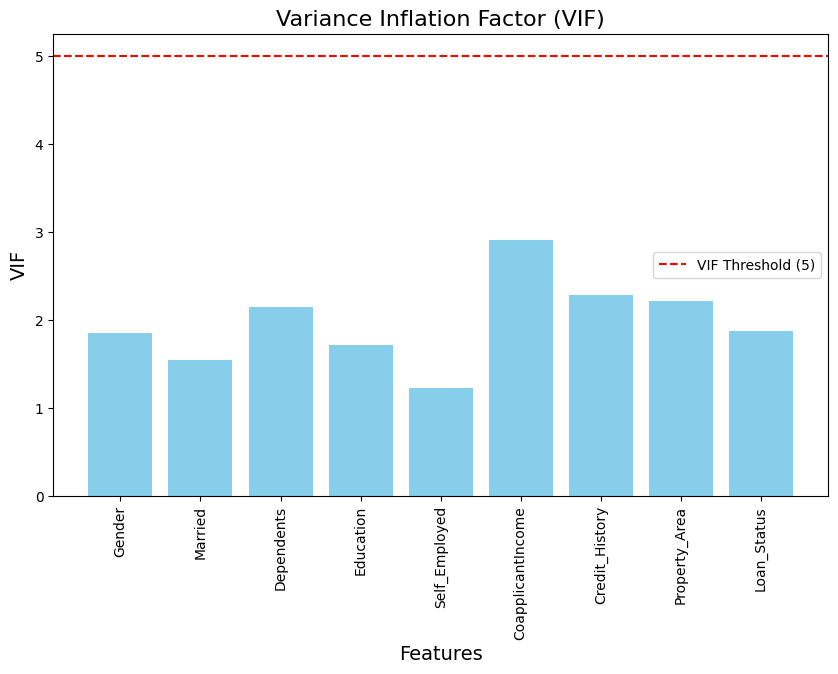

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

df1 = df.copy(deep=True)
df1 = df1.fillna(df1.mean())
numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns ",numerical_cols)
print()
X = df1[numerical_cols]

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

# Set a threshold for high VIF
vif_threshold = 5

# Identify columns with high VIF
high_vif_cols = vif[vif['VIF'] > vif_threshold]['Features'].tolist()

# Remove columns with high VIF from the dataset
if high_vif_cols:
    print(f"Removing columns with high VIF: {', '.join(high_vif_cols)}")
    X = X.drop(high_vif_cols, axis=1)

# Recalculate VIF after removing high VIF columns
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

print("VIF after removing high VIF columns:")
print(vif)

# Plot VIF values
plt.figure(figsize=(10, 6))
plt.bar(vif['Features'], vif['VIF'], color='skyblue')
plt.axhline(y=vif_threshold, color='r', linestyle='--', label=f'VIF Threshold ({vif_threshold})')
plt.xlabel('Features', fontsize=14)
plt.ylabel('VIF', fontsize=14)
plt.xticks(rotation=90)
plt.title('Variance Inflation Factor (VIF)', fontsize=16)
plt.legend()
plt.show()

Low Ranking Columns(need to remove) 
 Education            4
ApplicantIncome      5
CoapplicantIncome    6
LoanAmount           3
Loan_Amount_Term     2
dtype: int64
Columns to be removed 
 ['LoanAmount', 'ApplicantIncome', 'Loan_Amount_Term']
Remaining columns after removing high VIF and low-ranking RFE columns:
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'CoapplicantIncome', 'Credit_History', 'Property_Area'],
      dtype='object')


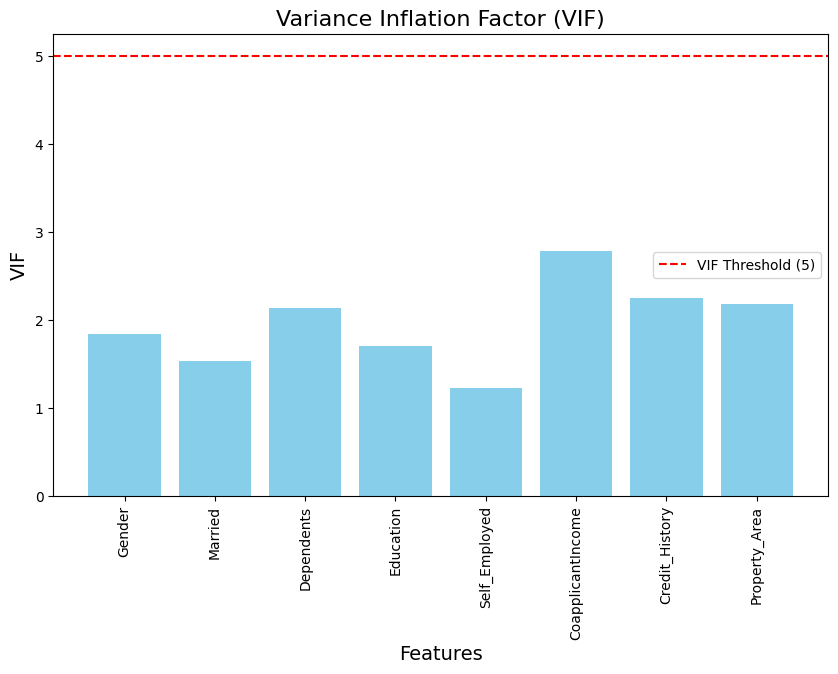

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

df2 = df.copy(deep=True)
df2 = df2.fillna(df2.mean())

# Select numerical columns
numerical_cols = df2.select_dtypes(include=['float64', 'int64']).columns

# Create a new DataFrame with only numerical columns
X = df2[numerical_cols].drop('Loan_Status', axis=1)  # Exclude the target variable
y = df2['Loan_Status']  # Target variable

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

# Set a threshold for high VIF
vif_threshold = 5

# Identify columns with high VIF
high_vif_cols = vif[vif['VIF'] > vif_threshold]['Features'].tolist()

# Perform Recursive Feature Elimination
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=6)  # Adjust the number of features to select
rfe.fit(X, y)

# Get the rankings from RFE
rankings = pd.Series(rfe.ranking_, index=X.columns)
print("Low Ranking Columns(need to remove) \n",rankings[rankings!=1])
# Identify columns to remove based on RFE rankings and high VIF
low_ranking_cols = set(rankings[rankings != 1].index)
cols_to_remove = list(low_ranking_cols.intersection(high_vif_cols))
print("Columns to be removed \n",cols_to_remove)
# # Identify columns to remove based on RFE rankings and high VIF
# cols_to_remove = list(rankings[rankings != 1].index) + high_vif_cols

# Remove the identified columns from the dataset
X = X.drop(cols_to_remove, axis=1)

print("Remaining columns after removing high VIF and low-ranking RFE columns:")
print(X.columns)

# Check if there is more than one column remaining
if X.shape[1] > 1:
    # Calculate VIF and plot for remaining columns
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)

    plt.figure(figsize=(10, 6))
    plt.bar(vif['Features'], vif['VIF'], color='skyblue')
    plt.axhline(y=vif_threshold, color='r', linestyle='--', label=f'VIF Threshold ({vif_threshold})')
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('VIF', fontsize=14)
    plt.xticks(rotation=90)
    plt.title('Variance Inflation Factor (VIF)', fontsize=16)
    plt.legend()
    plt.show()
else:
    print("Only one column remaining, VIF calculation is not applicable.")

## Different kinds of Plotting for Univariate, Bivariate & Multivariate Graphical analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Numerical vs Numerical

    scattered plot - tells us about linear/non-liear relation (correlation) between 2 numerical variables
    overlapping scattered plot/relplot - same as above but capture 2 features
    boxplot - useful for outlier detection

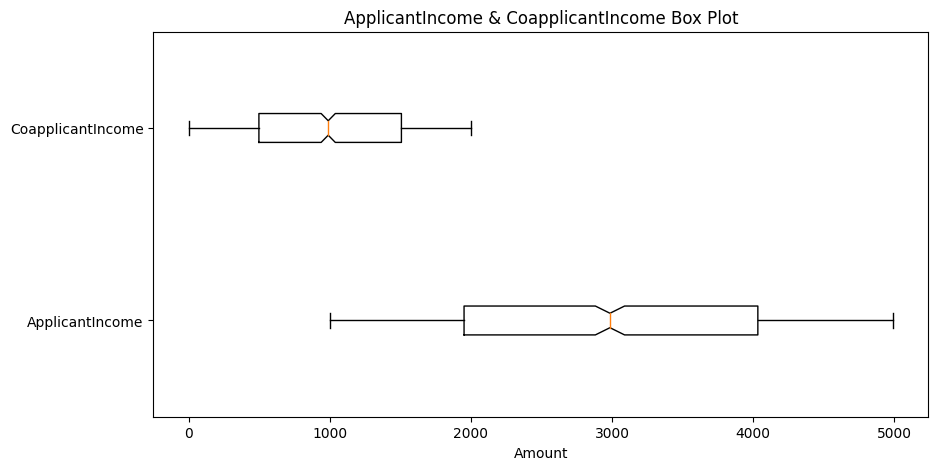

In [ ]:
data = [df['ApplicantIncome'],df['CoapplicantIncome']]
# for col in df_num:
#     data.append(train[col])
#     # plt.boxplot(train[col]) # this will print all feature differently
fig = plt.figure(figsize=(10,5))
ax=plt.subplot(111)
plt.boxplot(data,vert=False,notch=True)
ax.set_yticklabels(['ApplicantIncome', 'CoapplicantIncome'])
plt.xlabel('Amount')
plt.title('ApplicantIncome & CoapplicantIncome Box Plot')
plt.show()

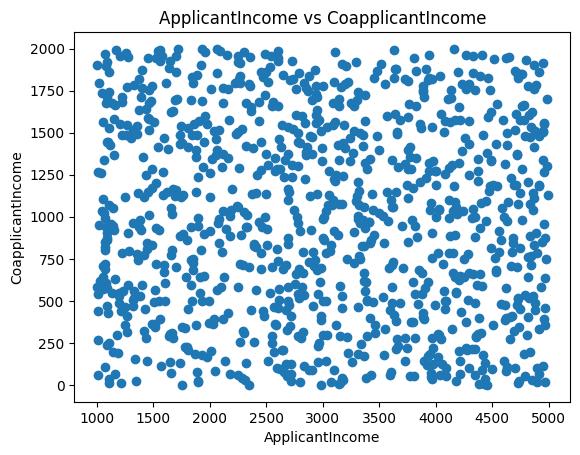

In [ ]:
#sns.boxplot(train['ApplicantIncome'],train['CoapplicantIncome'])
plt.scatter(df['ApplicantIncome'],df['CoapplicantIncome'])
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.title('ApplicantIncome vs CoapplicantIncome')
plt.show()

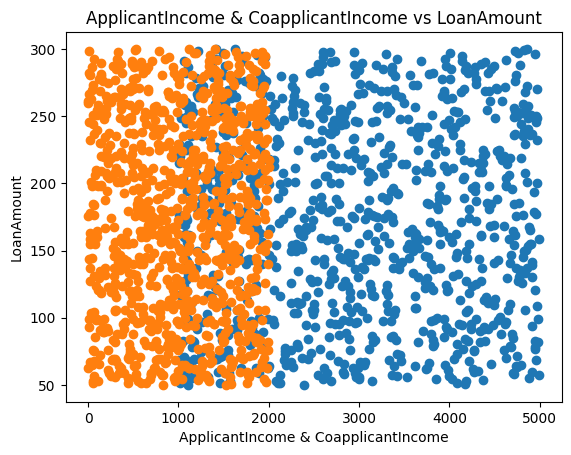

In [ ]:
plt.scatter(df['ApplicantIncome'],df['LoanAmount'])
plt.scatter(df['CoapplicantIncome'],df['LoanAmount'])
plt.xlabel('ApplicantIncome & CoapplicantIncome')
plt.ylabel('LoanAmount')
plt.title('ApplicantIncome & CoapplicantIncome vs LoanAmount')
plt.show()

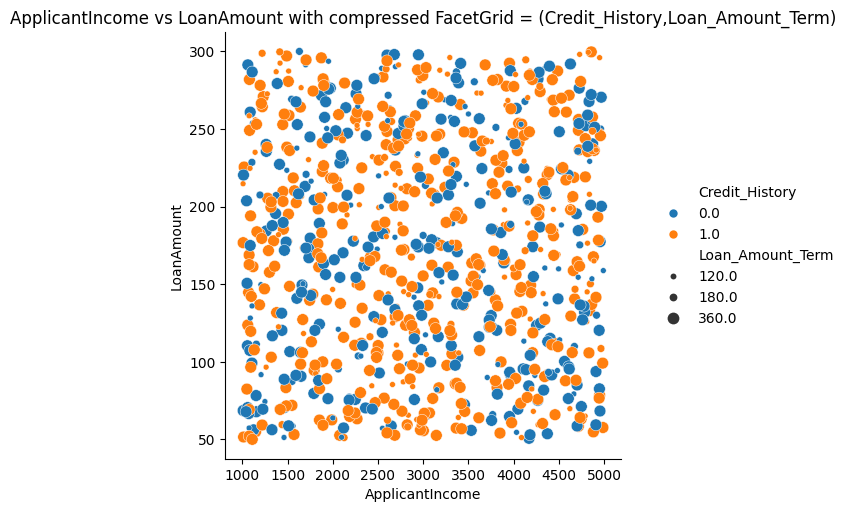

In [ ]:
sns.relplot(x='ApplicantIncome',y='LoanAmount', hue='Credit_History',
                size='Loan_Amount_Term',data=df)
plt.title('ApplicantIncome vs LoanAmount with compressed FacetGrid = (Credit_History,Loan_Amount_Term)')
plt.show()

### Single Numerical Frequency

    histogram - good for understanding distribution of individual
                continuous numerical variable
    distplot - histogram + kde PDF plot


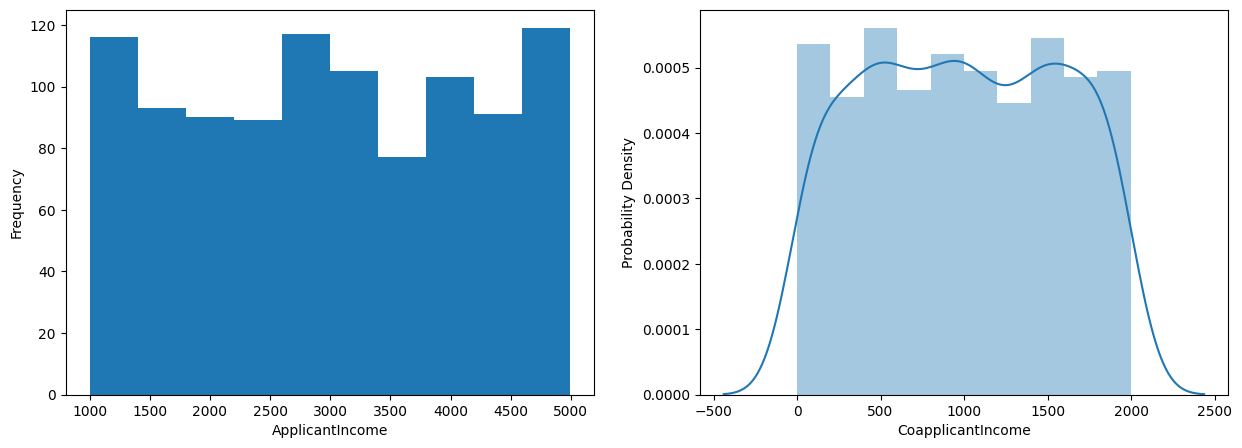

In [ ]:
plt.figure(figsize=(15,5))
ax1=plt.subplot(121)
ax2=plt.subplot(122)
ax1.hist(df['ApplicantIncome'],bins=10)
ax1.set_xlabel('ApplicantIncome')
ax1.set_ylabel('Frequency')
ax2=sns.distplot(df['CoapplicantIncome'])
ax2.set_xlabel('CoapplicantIncome')
ax2.set_ylabel('Probability Density')
plt.show()

### Categorical vs Categorical

    countplot - histograms across a categorical variable
    swarmplot - scatterplot on categorical feature (useful when number
                    of inputs are small)
    scatterplot - all 4 categorical, 3 categorical & 1 numerical
    kdeplot - plot of two categorical variable while keeping another one constant

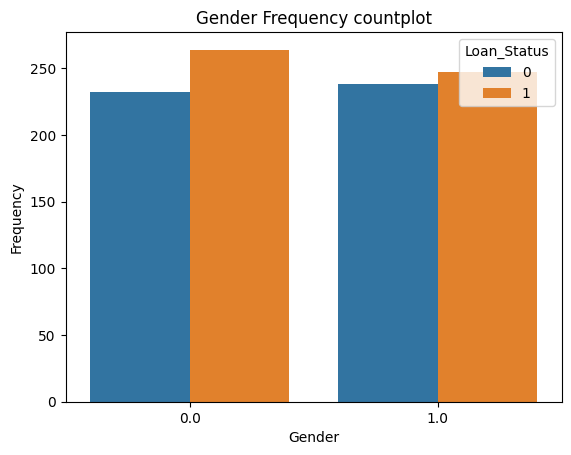

In [ ]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Frequency countplot')
plt.show()

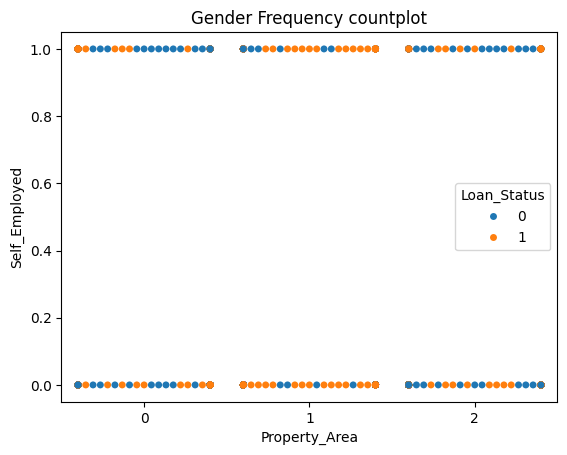

In [ ]:
sns.swarmplot(x='Property_Area',y='Self_Employed',hue='Loan_Status',data=df)
plt.xlabel('Property_Area')
plt.ylabel('Self_Employed')
plt.title('Gender Frequency countplot')
plt.show()

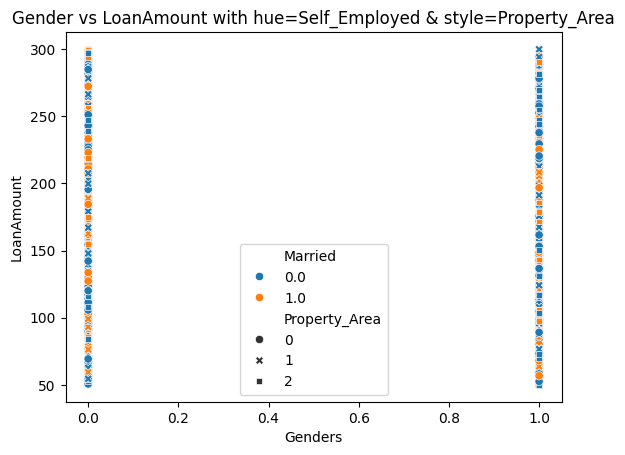

In [ ]:
sns.scatterplot(x='Gender',y='LoanAmount',hue='Married',style='Property_Area',data=df)
plt.xlabel('Genders')
plt.ylabel('LoanAmount')
plt.title('Gender vs LoanAmount with hue=Self_Employed & style=Property_Area')
plt.show()

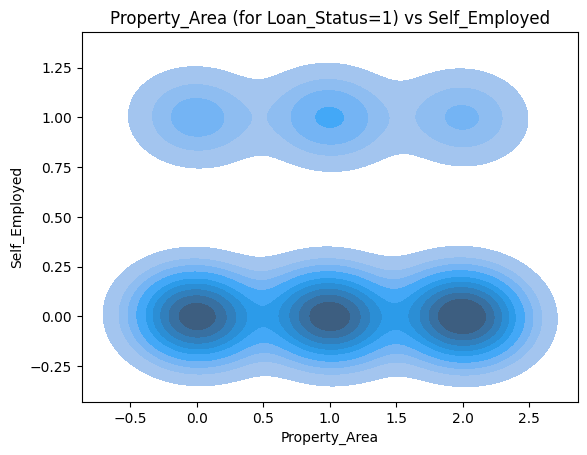

In [ ]:

sns.kdeplot(data=df[df['Loan_Status']==1], x='Property_Area', y='Self_Employed', shade=True)
plt.title('Property_Area (for Loan_Status=1) vs Self_Employed')
plt.show()

### Numerical vs Categorical

    barplot - estimate of central tendency for a numerical variable for each
            class on the x axis
    boxplot - useful for outlier detection , here we can use it with hue to study
            the effect of Numerical feature based on 2 categorical feature
    FacetGrid + histogram - 1 numerical continuous, 2 categorical
                    (here 'Credit_History' works as categorical)
    catplot - relationship between a numerical and one or more categorical
                variables
    

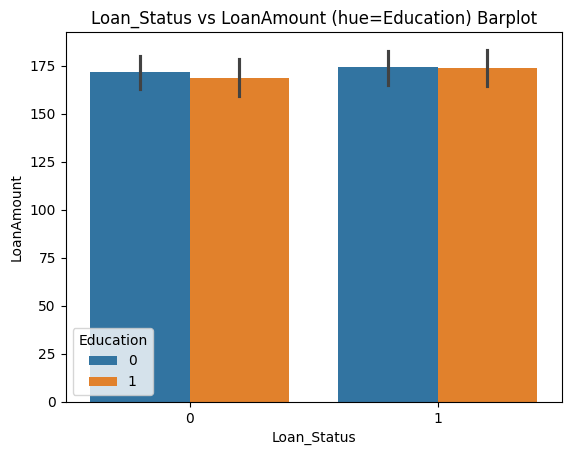

In [ ]:
sns.barplot(y='LoanAmount',x='Loan_Status',hue='Education',data=df)
plt.xlabel('Loan_Status')
plt.ylabel('LoanAmount')
plt.title('Loan_Status vs LoanAmount (hue=Education) Barplot')
plt.show()

# plt.scatter(train['Loan_Status'],train['ApplicantIncome'])
# sns.boxplot(train['ApplicantIncome'],train['CoapplicantIncome'])

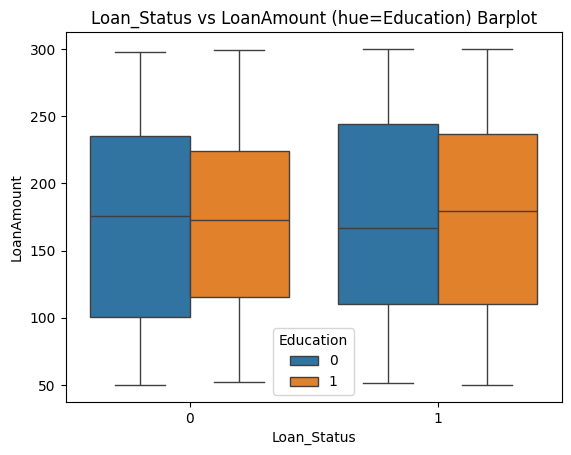

In [ ]:
sns.boxplot(y='LoanAmount',x='Loan_Status',hue='Education',data=df)
plt.xlabel('Loan_Status')
plt.ylabel('LoanAmount')
plt.title('Loan_Status vs LoanAmount (hue=Education) Barplot')
plt.show()

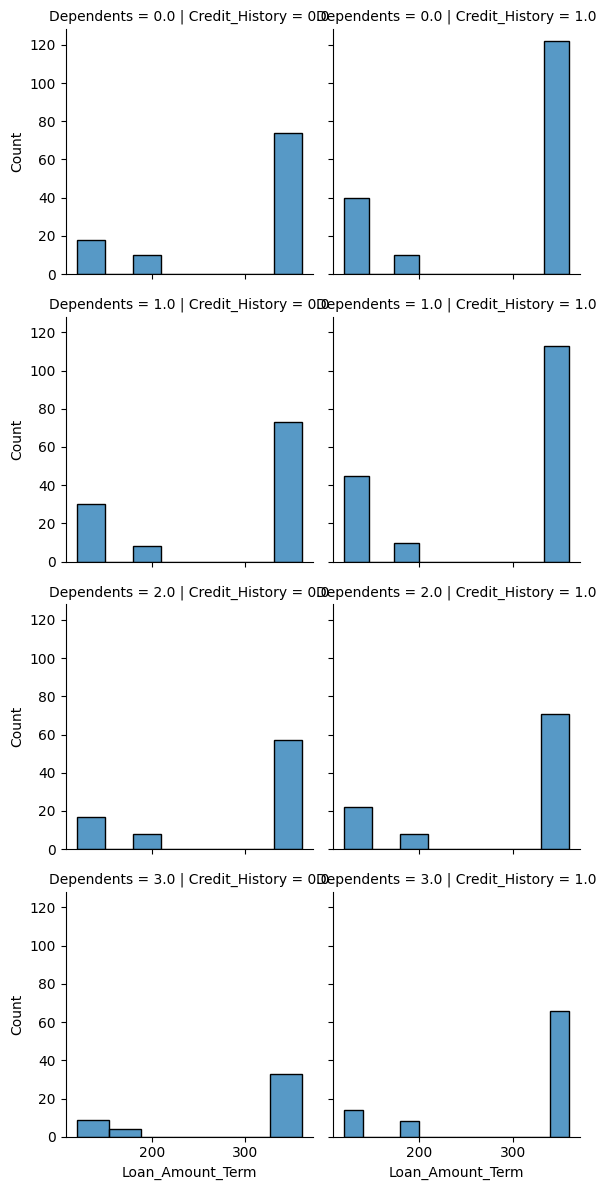

In [ ]:
g = sns.FacetGrid(df,col='Credit_History', row='Dependents')
g.map_dataframe(sns.histplot, x='Loan_Amount_Term')

### Multivariate
    heatmap - relation between all variables(here taking categorical only)
    clustermap - relation between all categorical variable
    pairplot - correlation between numerical variables

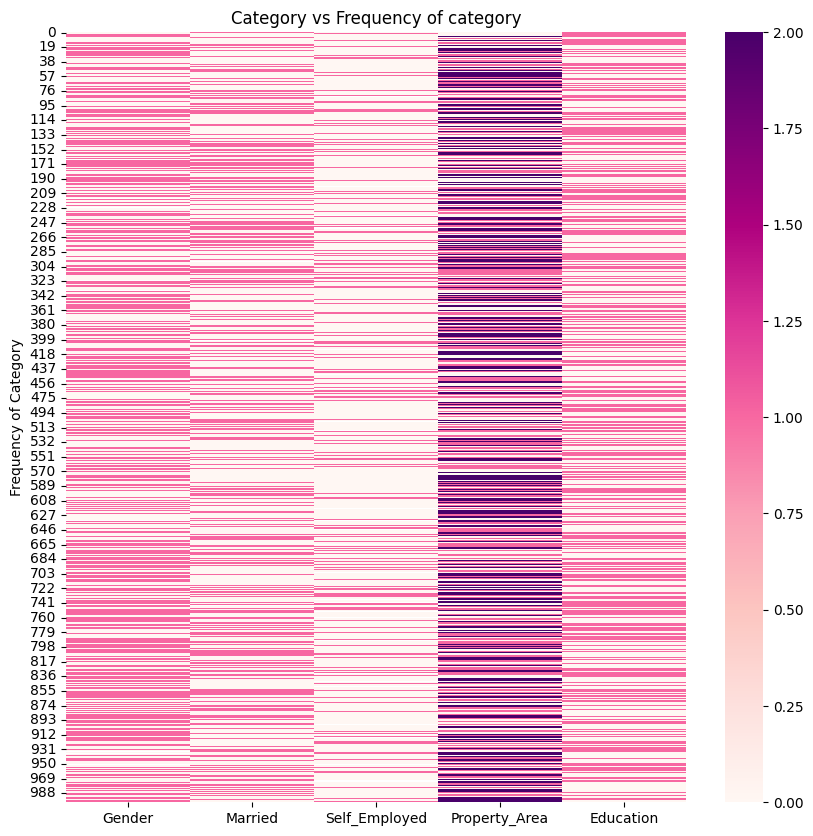

In [ ]:
df_c = df[['Gender', 'Married', 'Self_Employed','Property_Area','Education']]
fig=plt.figure(figsize=(10,10))
sns.heatmap(df_c,robust=True,cmap='RdPu')
plt.ylabel('Frequency of Category')
plt.title('Category vs Frequency of category')
plt.show()

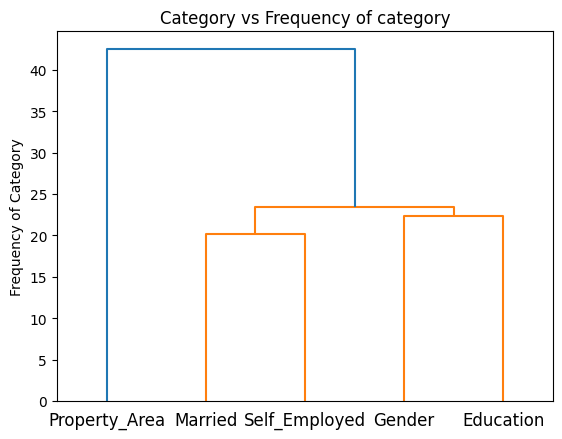

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

cols = ['Gender','Married','Education','Self_Employed','Property_Area']
df_c=[]
for col in cols:
   tmp = df[col]
   tmp.fillna(tmp.mode()[0],inplace=True)
   df_c.append(tmp)


Z = linkage(df_c, 'ward')
dn = dendrogram(Z,labels=cols)
plt.ylabel('Frequency of Category')
plt.title('Category vs Frequency of category')
plt.show()

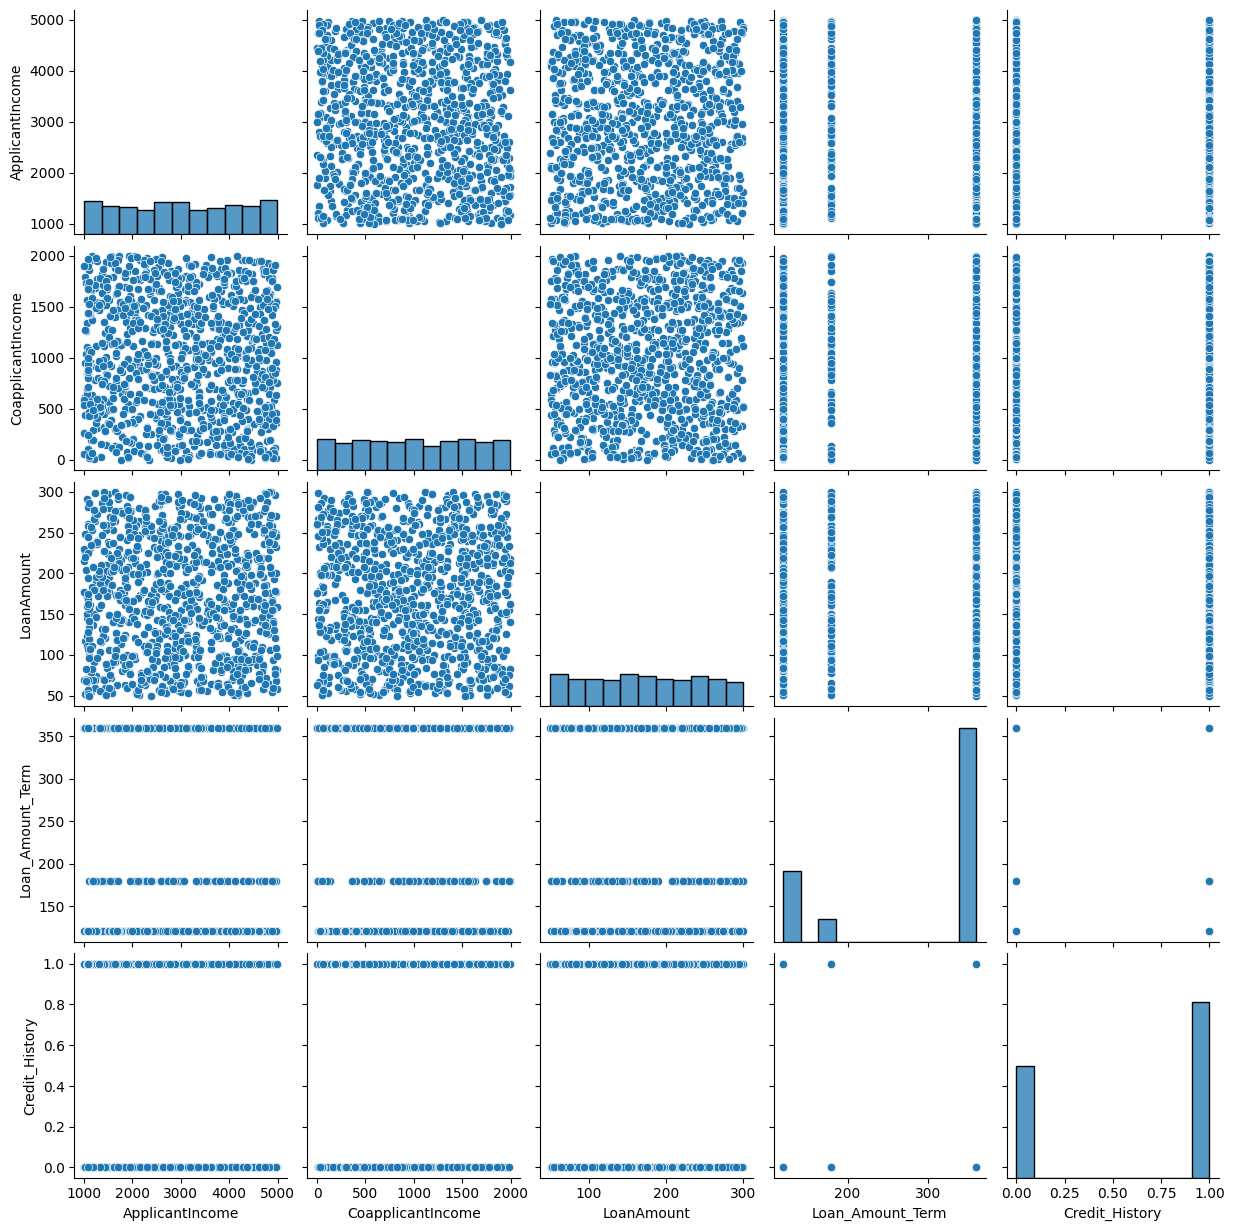

In [ ]:
df_n=df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]
sns.pairplot(data=df_n)